### What Are Embeddings?
Think of embeddings as a way to translate words into a language that computers understand - numbers!

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

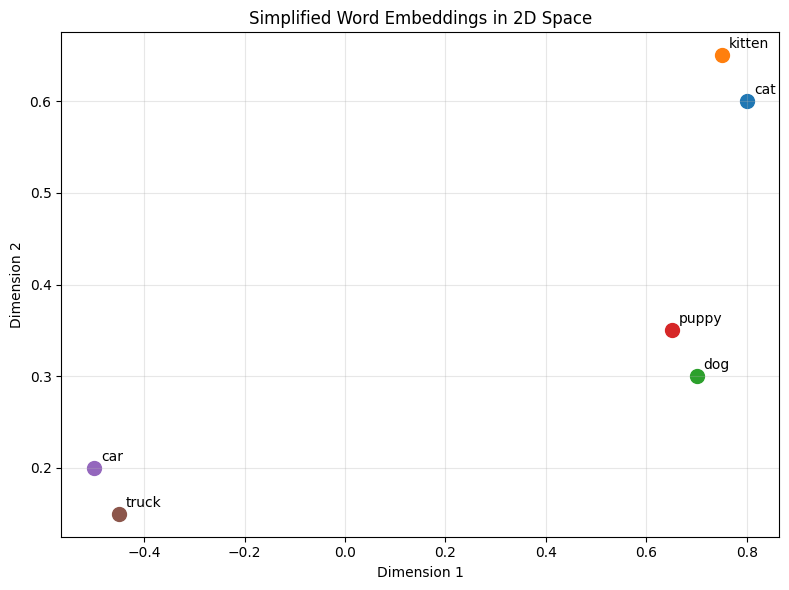

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Measuring Similarity

In [8]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)



In [9]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity=cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192183


In [10]:
cosine_similarity(cat_vector,car_vector)

np.float64(-0.4371858854891681)

### Creating Your First Embeddings

In [11]:
### Huggingface And OpenAI Models

from langchain_huggingface import HuggingFaceEmbeddings

## Initialize a simple Embedding model(no API Key needed!)
embeddings=HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings




c:\Udemy\RAGBootcamp\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [12]:
## create your first embeddings
text="Hello, I am learning about embeddings!"

embedding=embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length : {len(embedding)}")
print(embedding)


Text: Hello, I am learning about embeddings!
Embedding length : 384
[-0.018163328990340233, -0.09955169260501862, 0.013816121965646744, -0.008125878870487213, 0.01415223628282547, 0.06406482309103012, -0.0062533351592719555, -0.003017911920323968, 0.02528717927634716, -0.020198646932840347, 0.02432970143854618, 0.07435058802366257, 0.051177170127630234, 0.022038454189896584, -0.058306146413087845, 0.015268314629793167, 0.023584412410855293, 0.09455394744873047, -0.06508847326040268, 0.013296643272042274, -0.02049759030342102, -0.05690853297710419, 0.03030337020754814, -0.08365615457296371, 0.026596330106258392, -0.015231478959321976, -0.043615393340587616, 0.05398396775126457, 0.0902571752667427, -0.08893876522779465, 0.03964461013674736, -0.008834999985992908, -0.030343735590577126, 0.07425572723150253, -0.054099176079034805, 0.11108004301786423, 0.03689989075064659, -0.008959817700088024, -0.06140238791704178, -0.00314342207275331, 0.02195824310183525, 0.04220819100737572, -0.0289378

In [13]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])

[0.1304018199443817, -0.011870083399116993, -0.028117049485445023, 0.051238663494586945, -0.05597450211644173, 0.03019152767956257, 0.030161352828145027, 0.024698393419384956, -0.018370555713772774, 0.058766819536685944, -0.024953171610832214, 0.06015421822667122, 0.03983176872134209, 0.0332304947078228, -0.06131138280034065, -0.049373142421245575, -0.05486349016427994, -0.04007609561085701, 0.05642910674214363, 0.03915659710764885, -0.034737102687358856, -0.01324771624058485, 0.0319661945104599, -0.06349920481443405, -0.06017860397696495, 0.07823450118303299, -0.02830386906862259, -0.04744282364845276, 0.040359314531087875, -0.006630911026149988, -0.06674095243215561, -0.004191297106444836, -0.02531169168651104, 0.05334165692329407, 0.01742810197174549, -0.09792358428239822, 0.0060613094829022884, -0.06524165719747543, 0.045572590082883835, 0.02364177070558071, 0.07658485323190689, -0.01026434451341629, -0.004076797515153885, -0.062322791665792465, 0.03370523825287819, 0.0186611078679

In [14]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications

